Telco Customer Churn Prediction

**1. Importing Essential Libraries**

In [6]:
# Importing Essential Libraries

# Core libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Missing values visualization
import missingno as msno

# Warning configuration
import warnings
warnings.filterwarnings(action='ignore')

# Visualization settings
plt.rcParams['figure.figsize'] = (8, 5)
sns.set_style('whitegrid')

# Optional: prettier color palette
custom_palette = sns.color_palette("coolwarm")  # ✅ as_cmap 제거
sns.set_palette(custom_palette)


In [7]:
!pip install catboost

In [8]:
# Preprocessing & Feature Scaling
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Core Machine Learning Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    ExtraTreesClassifier
)

# Additional ML Algorithms
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Gradient Boosting Alternatives
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Model Evaluation & Validation Tools
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score,
    f1_score, roc_curve, confusion_matrix, classification_report
)




In [9]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [10]:
import pandas as pd
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

**Undertanding the data**

In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
pip install pandas numpy matplotlib seaborn plotly missingno scikit-learn xgboost catboost


In [13]:
# overview of the dataset to verify columns and data format.
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Summary of the table:

1) Customer account information – includes details such as tenure, contract type, paperless billing status, payment method, monthly charges, and total charges.

2) Subscribed services – shows which services each customer has signed up for, ranging from phone service to streaming movies.

3) Customer demographics – provides demographic details such as gender, senior citizen status, partner, and dependents.

4) Churn column – located on the far right, it indicates whether a customer discontinued the service within the last month (“Yes” = churned).

5) Customer ID – each record in the dataset is uniquely identified by a customer ID.

In [14]:
# Check the number of rows and columns in the dataset
df.shape

(7043, 21)

In [15]:
# Get a concise summary of the DataFrame including data types, non-null counts, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
# List all column names as an array
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [17]:
import pandas as pd
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


**Visualize missing values**

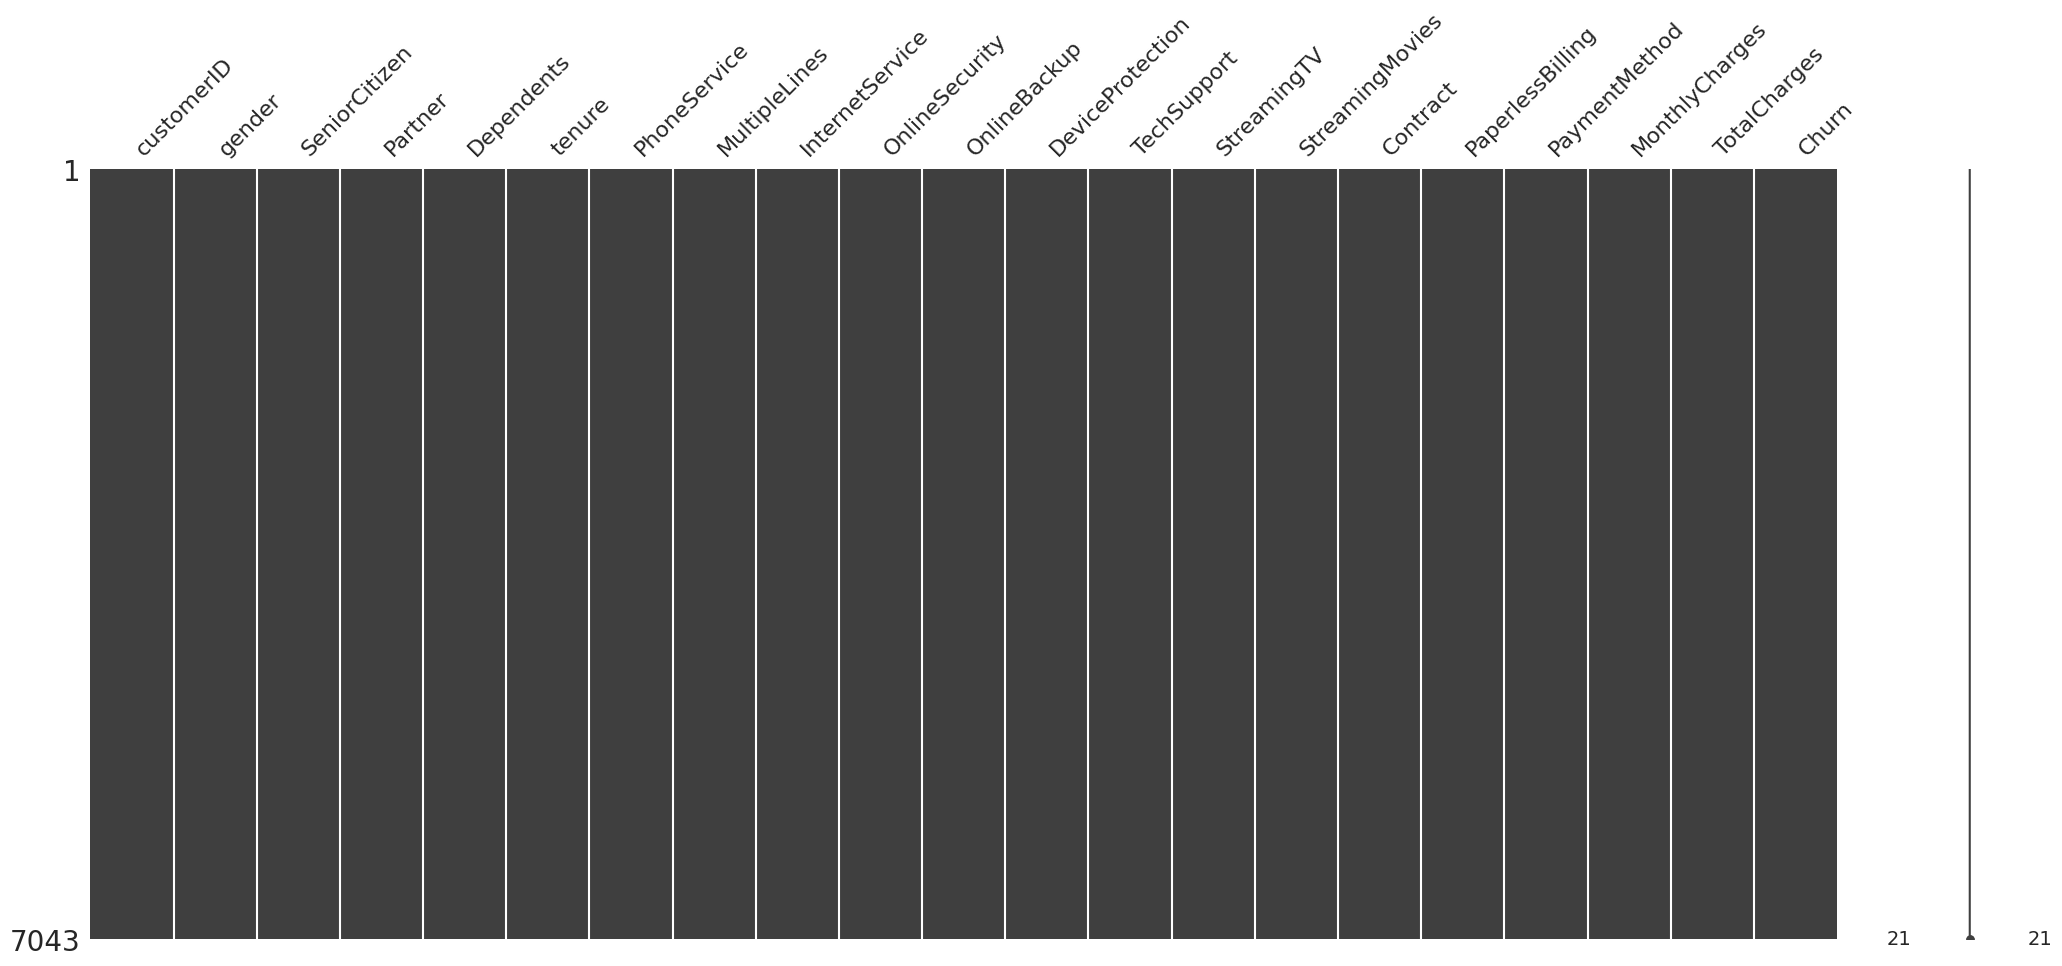

In [18]:
#Visualizing the dataset to check for missing values.
msno.matrix(df);


Looking at the visualized dataset, there are no empty spaces and the pattern is consistent.
This indicates that there are no missing values in the dataset.

Data Manipulation

In [19]:
df = df.loc[:, df.columns != 'customerID']
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
# Replace blank strings with NaN, then convert to numeric safely
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check the number of missing values per column
df.isnull().sum()


,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


The above indicates that the TotalCharges column has 11 NaN values, while the other columns have no missing values.

In [21]:
# Select rows where 'TotalCharges' column has missing values (NaN)
df.query("TotalCharges != TotalCharges")


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


The Tenure column shows 0 for the rows where TotalCharges is NaN.
Next, I will check if there are any 0 values in the Tenure column.

In [22]:
# Select the indices of rows where the 'tenure' column has a value of 0
df[df['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

Since there are only 11 rows with missing values, they represent a very small portion of the entire dataset. Therefore, I will remove these rows, as doing so will not significantly affect the overall analysis or model performance.

In [23]:
# Remove all rows where the tenure value is 0
df = df[df['tenure'] != 0]
df[df['tenure'] == 0].index


Index([], dtype='int64')

Filling missing TotalCharges values with the mean helps maintain data consistency without removing valuable rows.
Since TotalCharges is a numeric variable, using the mean is a simple and reasonable approach.

In [24]:
# Replace NaN values with the mean of TotalCharges
df.fillna(df["TotalCharges"].mean())





,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [25]:
# Count the number of missing (NaN) values in each column
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [26]:
# Convert 0/1 in 'SeniorCitizen' column to 'No'/'Yes' for readability
df["SeniorCitizen"] = df["SeniorCitizen"].replace({0: "No", 1: "Yes"})
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
# Display summary statistics for the "InternetService" column
df["InternetService"].describe()

,InternetService
count,7032
unique,3
top,Fiber optic
freq,3096


In [28]:
# Display summary statistics for selected numerical columns

df.iloc[:, [df.columns.get_loc('tenure'), df.columns.get_loc('MonthlyCharges'), df.columns.get_loc('TotalCharges')]].describe()




,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


**Data Visualization**

In [29]:
import plotly.express as px

# Create a pie chart for gender
fig1 = px.pie(df, names='gender', title='Gender Distribution', hole=0.4)

# Create a pie chart for churn
fig2 = px.pie(df, names='Churn', title='Churn Distribution', hole=0.4)

fig1.show()
fig2.show()


About 26.6% of the customer base churned to a competitor.
Gender-wise, the customers are almost evenly split: 49.5% female and 50.5% male.


In [30]:
# Count customers who did not churn, grouped by gender
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()


,Churn
gender,
Female,2544
Male,2619


In [31]:
# Alternative: groupby and size for churned customers
df[df["Churn"] == "Yes"].groupby("gender").size()


,0
gender,
Female,939
Male,930


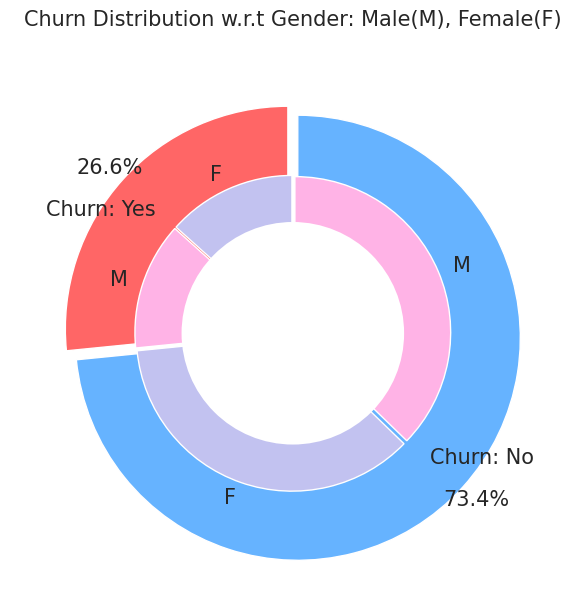

In [32]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(6,6))

# Outer donut (Churn distribution)
labels_churn = ["Churn: Yes", "Churn: No"]
sizes_churn = [1869, 5163]
colors_churn = ['#ff6666', '#66b3ff']
explode_churn = (0.3, 0.3)  # Separate slices for emphasis
textprops = {"fontsize": 15}

# Inner donut (Gender-wise Churn distribution)
labels_gender = ["F", "M", "F", "M"]
sizes_gender = [939, 930, 2544, 2619]
colors_gender = ['#c2c2f0','#ffb3e6','#c2c2f0','#ffb3e6']
explode_gender = (0.1, 0.1, 0.1, 0.1)

# Plot outer donut
plt.pie(
    sizes_churn,
    labels=labels_churn,
    autopct='%1.1f%%',
    pctdistance=1.08,
    labeldistance=0.8,
    colors=colors_churn,
    startangle=90,
    frame=True,
    explode=explode_churn,
    radius=10,
    textprops=textprops,
    counterclock=True
)

# Plot inner donut
plt.pie(
    sizes_gender,
    labels=labels_gender,
    colors=colors_gender,
    startangle=90,
    explode=explode_gender,
    radius=7,
    textprops=textprops,
    counterclock=True
)

# Draw central white circle to create donut effect
centre_circle = plt.Circle((0,0),5, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Set title
plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# Equal axis and layout adjustment
plt.axis('equal')
plt.tight_layout()

# Show plot
plt.show()


There is a very small variation in the percentage of customers changing service providers, with male and female customers exhibiting comparable patterns.

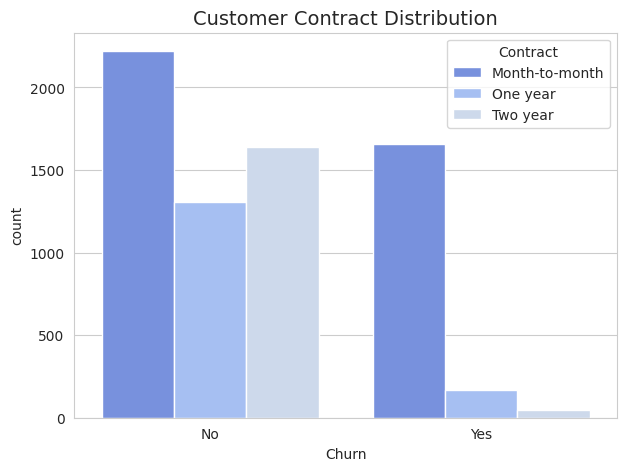

In [33]:
# Set figure size for better readability
plt.figure(figsize=(7,5))

# Create a grouped bar chart showing the count of Churn values for each Contract type
sns.countplot(data=df, x='Churn', hue='Contract')

# Add title to the chart
plt.title("Customer Contract Distribution", fontsize=14)

# Display the plot
plt.show()


Approximately three-quarters of customers with a Month-to-Month contract churned, whereas only 13% of One-Year and 3% of Two-Year contract holders did so.

In [34]:
# Create a donut chart to visualize distribution of payment methods
# The 'hole' parameter makes the pie chart look like a donut
fig = px.pie(
    df,
    names='PaymentMethod',
    title='Payment Method Distribution',
    hole=0.3
)

# Display the chart
fig.show()


In [35]:
# Create stacked histogram to visualize how payment methods differ between churned and non-churned customers
fig = px.histogram(
    df,
    x="Churn",
    color="PaymentMethod",
    title="<b>Customer Payment Method Distribution w.r.t. Churn (Stacked)</b>",
    barmode="stack"
)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


Most customers who churned used Electronic Check as their payment method.
In contrast, those using Credit Card Auto-Pay, Bank Transfer, or Mailed Check were less likely to churn.

In [36]:
# Display unique values in the 'InternetService' column using drop_duplicates()
df["InternetService"].drop_duplicates().values

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [37]:
# Group by InternetService and Churn for male customers, then count occurrences
df[df["gender"]=="Male"].groupby(["InternetService", "Churn"]).size()


InternetService  Churn
DSL              No       992
                 Yes      240
Fiber optic      No       910
                 Yes      633
No               No       717
                 Yes       57
dtype: int64

In [38]:
# Count the number of female customers for each combination of InternetService and Churn
df[df["gender"]=="Female"].groupby(["InternetService", "Churn"]).size()


InternetService  Churn
DSL              No       965
                 Yes      219
Fiber optic      No       889
                 Yes      664
No               No       690
                 Yes       56
dtype: int64

In [39]:
# Group the dataset by InternetService, Churn, and Gender and count the occurrences
grouped = df.groupby(["InternetService", "Churn", "gender"]).size().reset_index(name="count")

# Plot using Plotly
fig = go.Figure()

for service in grouped["InternetService"].unique():
    temp = grouped[grouped["InternetService"] == service]
    fig.add_trace(go.Bar(
        x=temp["Churn"] + " : " + temp["gender"],  # combine Churn and Gender for x-axis
        y=temp["count"],
        name=service
    ))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")
fig.show()


Many customers subscribe to Fiber optic internet, and a noticeable portion of them have churned, which could indicate dissatisfaction with this service type.
In contrast, most customers use DSL, and they tend to churn less frequently compared to those using Fiber optic.

In [40]:
# Count number of customers by Churn and Dependents
grouped = df.groupby(["Churn", "Dependents"]).size().reset_index(name="count")

# Plot grouped bar chart
fig = go.Figure()

for dep in grouped["Dependents"].unique():
    temp = grouped[grouped["Dependents"] == dep]
    fig.add_trace(go.Bar(
        x=temp["Churn"],
        y=temp["count"],
        name=dep
    ))

fig.update_layout(
    title="<b>Dependents distribution</b>",
    barmode="group",
    width=700,
    height=500,
    bargap=0.1
)

fig.show()


Customers with no dependents have a higher tendency to churn.

In [41]:
# Group dataset by Churn and Partner
grouped = df.groupby(["Churn", "Partner"]).size().reset_index(name="count")

# Create grouped bar chart
fig = go.Figure()

for partner in grouped["Partner"].unique():
    temp = grouped[grouped["Partner"] == partner]
    fig.add_trace(go.Bar(
        x=temp["Churn"],
        y=temp["count"],
        name=partner
    ))

fig.update_layout(
    title="<b>Churn distribution w.r.t. Partners</b>",
    barmode="group",
    width=700,
    height=500,
    bargap=0.1
)

fig.show()


Customers with no partners are more likely to churn

In [42]:
# Visualize churn distribution by senior citizen status using Plotly Express
# Shows how many senior vs non-senior customers have churned or stayed
fig = px.bar(
    df,
    x="Churn",
    color="SeniorCitizen",
    title="<b>Churn Distribution by Senior Citizen Status</b>",
    color_discrete_sequence=['#2E91E5', '#E15F99'],
    barmode='group'
)

# Adjust chart layout for better readability
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


It shows that senior citizens represent a small portion of the customer base, but most of them tend to churn.

In [43]:
# Visualize churn distribution by Online Security status using Plotly Express
# This chart compares churned vs. non-churned customers by whether they have Online Security service
fig = px.bar(
    df,
    x="Churn",                    # X-axis: churn status (Yes / No)
    color="OnlineSecurity",       # Color: online security availability (Yes / No / No internet service)
    title="<b>Churn Distribution by Online Security</b>",
    color_discrete_sequence=["#FF97FF", "#AB63FA"],  # Same colors, using sequence instead of map
    barmode="group"               # Grouped bar chart for side-by-side comparison
)

# Adjust chart layout for better readability
fig.update_layout(width=700, height=500, bargap=0.1)

# Show the figure
fig.show()


Most customers without online security tend to churn.

In [44]:
# Visualize churn distribution with respect to Paperless Billing
# This chart shows how customers with or without paperless billing differ in churn behavior.

import plotly.express as px

# Define custom colors for 'Yes' and 'No' categories
custom_colors = ['#00CC96', '#FFA15A']

# Create grouped bar chart using Plotly Express
fig = px.bar(
    df,
    x="Churn",
    color="PaperlessBilling",
    title="<b>Churn Distribution by Paperless Billing</b>",
    color_discrete_sequence=custom_colors,  # list instead of color_discrete_map
    barmode="group"  # side-by-side bars
)

# Adjust layout for better readability
fig.update_layout(width=700, height=500, bargap=0.1)

# Show the figure
fig.show()



Customers who use paperless billing show a higher tendency to churn.

In [45]:
# Visualize churn distribution based on Tech Support subscription
# Using grouped bar chart to compare Churn vs TechSupport
fig = px.bar(
    df,
    x="Churn",
    color="TechSupport",
    barmode="group",  # group bars instead of stacking
    title="<b>Churn Distribution with Respect to Tech Support</b>",
    color_discrete_sequence=['#636EFA', '#EF553B']  # optional: set custom colors
)

# Adjust layout for readability
fig.update_layout(width=700, height=500, bargap=0.1)

# Display the chart
fig.show()
